# Maven Music

##### O plano é usar uma técnica de aprendizagem supervisionada para prever quais clientes têm maior probabilidade de cancelar sua assinatura usando dados de clientes dos últimos três meses, que incluem assinatura e histórico de escuta.

In [36]:
import pandas as pd
import numpy as np

customers = pd.read_csv('../My_Datas/Data/maven_music_customers.csv')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [37]:
listening_history = pd.read_excel('../My_Datas/Data/maven_music_listening_history.xlsx')
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [38]:
audio = pd.read_excel("../My_Datas/Data/maven_music_listening_history.xlsx", sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [39]:
sessions = pd.read_excel("../My_Datas/Data/maven_music_listening_history.xlsx", sheet_name=2)
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


### Clean Data


In [40]:
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [41]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [42]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [43]:
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [44]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [45]:
#Covert objects to numeric and datetime fields
customers['Member Since'] = pd.to_datetime(customers['Member Since'])
customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].str.replace('$', ''))
customers['Subscription Plan'] = pd.to_datetime(customers['Cancellation Date'])

C:\Users\Fezeg\AppData\Local\Temp\ipykernel_1120\4158364259.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since'] = pd.to_datetime(customers['Member Since'])
C:\Users\Fezeg\AppData\Local\Temp\ipykernel_1120\4158364259.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Subscription Plan'] = pd.to_datetime(customers['Cancellation Date'])


In [46]:
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan    datetime64[ns]
Subscription Rate           float64
Discount?                    object
Cancellation Date            object
dtype: object

In [47]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  13 non-null     datetime64[ns]
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [48]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [49]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [50]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [51]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,NaT,2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaT,2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,2023-06-01,2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,NaT,2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaT,2.99,NaN,NaN


In [52]:
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,NaT,2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaT,2.99,NaN,NaN
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,NaT,2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaT,2.99,NaN,NaN
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,NaT,9.99,NaN,NaN
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,NaT,9.99,NaN,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,NaT,2.99,NaN,NaN
10,5826,Chord Hayes,Email: harmonic.chord@email.com,2023-03-28,NaT,2.99,NaN,NaN
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaT,2.99,NaN,NaN
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,NaT,9.99,NaN,NaN


In [53]:
customers[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,NaT
2,2.99,2023-06-01
5,2.99,2023-06-03
6,9.99,NaT
7,9.99,2023-06-02
15,99.99,2023-06-02
21,7.99,NaT
22,7.99,2023-06-02
25,7.99,2023-06-01
28,7.99,2023-06-03


In [54]:
customers["Subscription Plan"] = customers['Subscription Plan'].fillna("Basic (Ads)")
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaN


In [55]:
customers[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [56]:
customers['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [57]:
customers['Discount?'] = np.where(customers['Discount?'] == 'Yes', 1, 0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,0,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaN


In [58]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?
count,30.000000,30,30.000000,30.000000
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000
std,814.255587,NaN,17.517840,0.430183


In [59]:
customers[customers['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Basic (Ads),9.99,0,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,2023-06-02 00:00:00,9.99,0,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Basic (Ads),9.99,0,NaN
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,2023-06-02 00:00:00,9.99,0,6/2/23
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Basic (Ads),9.99,0,NaN
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,2023-06-02 00:00:00,99.99,0,6/2/23


In [61]:
customers.iloc[15, 5] = 9.99

In [62]:
customers['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [63]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [64]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [65]:
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [66]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [67]:
audio.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [68]:
audio.Genre = np.where(audio.Genre == 'Pop Music', 'Pop', audio.Genre)
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [69]:
sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

In [70]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [71]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [72]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?
count,30.000000,30,30.000000,30.000000
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000
std,814.255587,NaN,3.058998,0.430183


In [73]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [74]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [75]:
sessions.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


In [76]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,0,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaN


In [78]:
customers['Cancelled'] = np.where(customers['Cancellation Date'].notna(), 1, 0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaN,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaN,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,0,6/1/23,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaN,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaN,0


In [79]:
customers['Email'] = customers.Email.str[6:]
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaN,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaN,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,0,6/1/23,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaN,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaN,0


## EDA

In [80]:
customers[customers['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,0,6/1/23,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,2023-06-03 00:00:00,2.99,0,6/3/23,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,2023-06-02 00:00:00,9.99,0,6/2/23,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,2023-06-02 00:00:00,9.99,0,6/2/23,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,2023-06-01 00:00:00,2.99,0,6/1/23,1


In [85]:
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])

C:\Users\Fezeg\AppData\Local\Temp\ipykernel_1120\3963261944.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])


In [87]:
(customers['Cancellation Date'] - customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [91]:
discount_yes = customers[customers['Discount?'] ==1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Basic (Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,2023-06-02 00:00:00,7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,2023-06-02 00:00:00,7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,2023-06-01 00:00:00,7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,2023-06-01 00:00:00,7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,2023-06-03 00:00:00,7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,2023-06-01 00:00:00,7.99,1,2023-06-01,1


In [92]:
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

In [93]:
discount_no = customers[customers['Discount?'] ==0]
discount_no

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,2023-06-01 00:00:00,2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,2023-06-03 00:00:00,2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Basic (Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,2023-06-02 00:00:00,9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Basic (Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [94]:
discount_no.Cancelled.sum() / discount_no.Cancelled.count()

0.30434782608695654

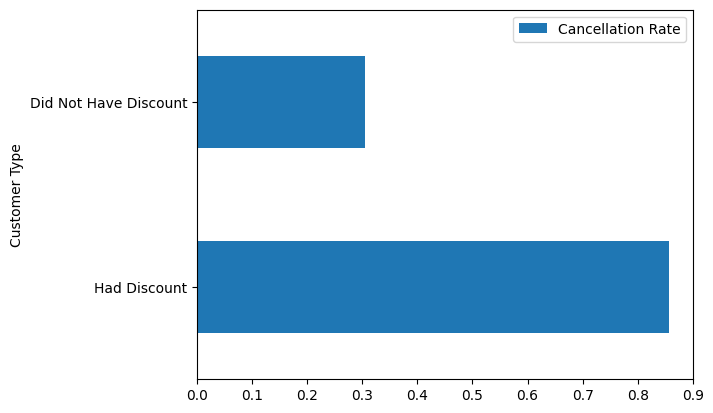

In [95]:
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );